**Question 1**

Le dataset Iris est un jeu de donn√©es embl√©matique en statistique et apprentissage automatique.

Origine :
Il a √©t√© cr√©√© par Ronald A. Fisher en 1936 dans le cadre d'une √©tude sur l'analyse discriminante et il est souvent utilis√© pour d√©montrer des algorithmes de classification et des m√©thodes d'analyse des donn√©es.

Les variables :
Le dataset contient 150 observations r√©parties √©quitablement sur 3 classes d'esp√®ces d'iris :

Setosa, Versicolor, et Virginica (50 √©chantillons par esp√®ce).
Chaque observation comporte 4 variables ind√©pendantes (caract√©ristiques mesur√©es en cm) :

Sepal Length (longueur du s√©pale)
Sepal Width (largeur du s√©pale)
Petal Length (longueur du p√©tale)
Petal Width (largeur du p√©tale)

La variable cible est l'esp√®ce d'iris √† laquelle appartient chaque observation.

Objectifs :
-Classification
-Visualisation des donn√©es
-Analyse discriminante
-Apprentissage automatique

**Question 2**


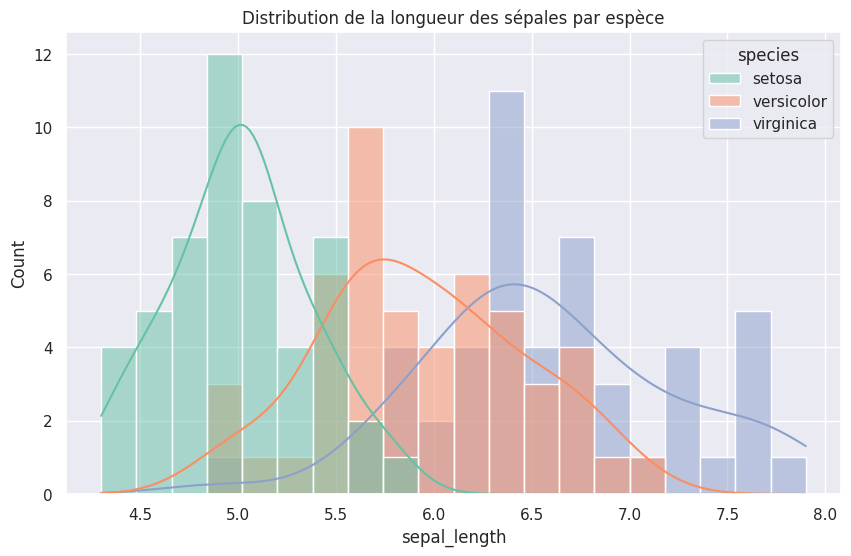

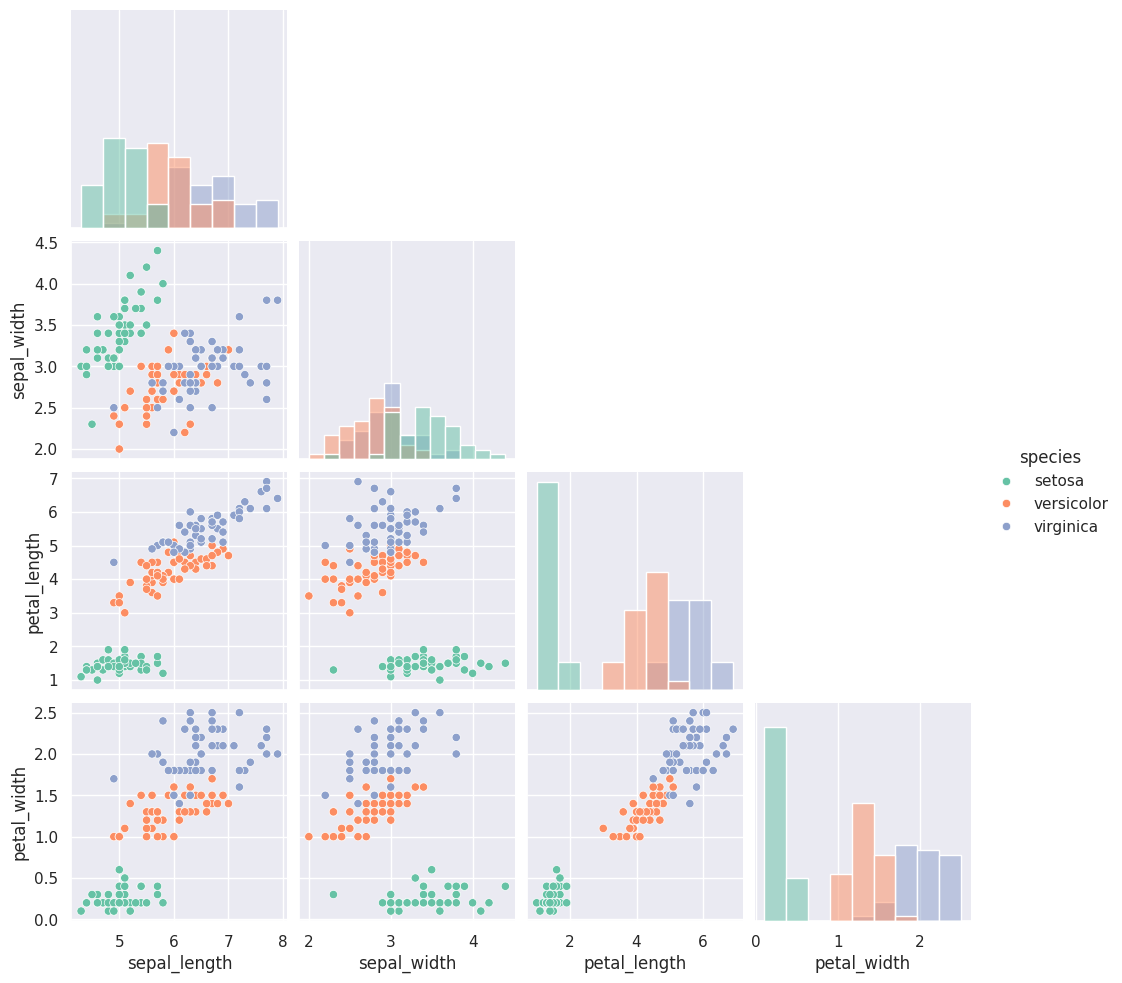

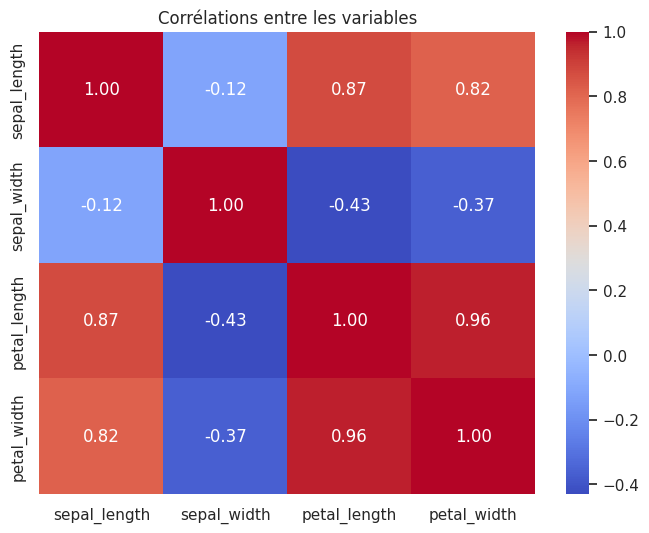

<ipython-input-9-fc049517e814>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x="species", y="petal_length", palette="Set2")


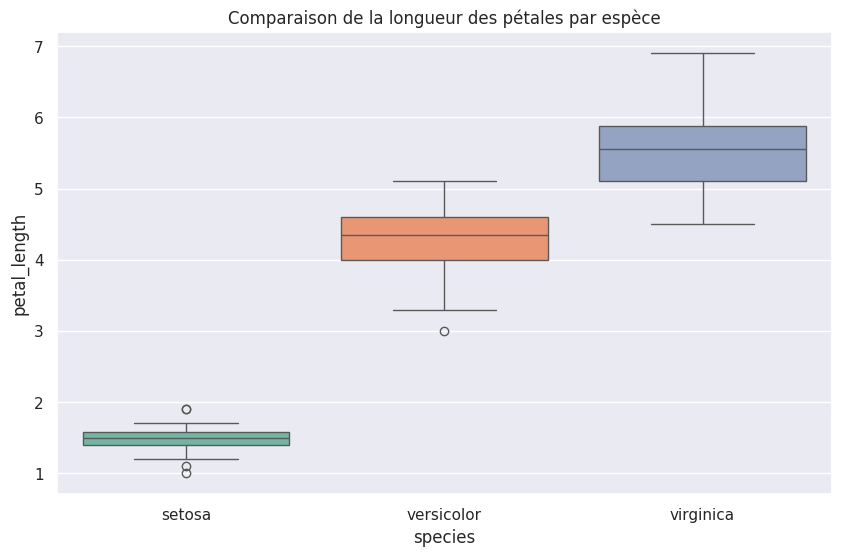

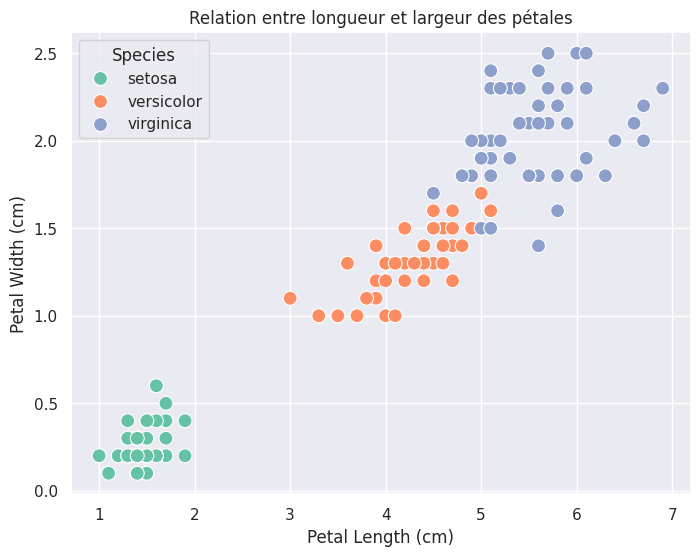

In [9]:
# Importation des biblioth√®ques n√©cessaires
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Chargement du dataset Iris et conversion en DataFrame
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Renommer les colonnes pour des noms plus simples
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# --- 1. Visualisation des distributions individuelles ---
# Histogramme de la longueur des s√©pales par esp√®ce
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x="sepal_length", hue="species", kde=True, palette="Set2", bins=20)
plt.title("Distribution de la longueur des s√©pales par esp√®ce")
plt.show()

# --- 2. Relations entre les variables : Pairplot ---
# Pairplot pour explorer toutes les relations entre les variables
sns.pairplot(iris_df, hue='species', diag_kind='hist', corner=True, palette='Set2')
plt.show()

# --- 3. Corr√©lations : Heatmap ---
# Heatmap des corr√©lations entre les variables
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")  # Ajout de numeric_only pour corriger d'√©ventuelles erreurs
plt.title("Corr√©lations entre les variables")
plt.show()

# --- 4. Comparaison des esp√®ces : Boxplots ---
# Boxplot pour comparer la longueur des p√©tales entre les esp√®ces
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x="species", y="petal_length", palette="Set2")
plt.title("Comparaison de la longueur des p√©tales par esp√®ce")
plt.show()

# --- 5. Zoom sur deux variables cl√©s ---
# Scatterplot pour visualiser la relation entre longueur et largeur des p√©tales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x="petal_length", y="petal_width", hue="species", palette="Set2", s=100)
plt.title("Relation entre longueur et largeur des p√©tales")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()


**Question 3**

Observations importantes √† partir des visualisations:
1. Distributions individuelles (Histogramme - Longueur des s√©pales)

    ‚Ä¢	Les distributions de la longueur des s√©pales montrent un chevauchement significatif entre les trois esp√®ces.

    ‚Ä¢	Iris-setosa semble avoir des s√©pales l√©g√®rement plus courts en moyenne, mais cette variable seule ne suffit pas √† s√©parer les esp√®ces.
________________________________________
2. Relations entre les variables (Pairplot)

    ‚Ä¢	Les p√©tales (longueur et largeur) permettent une s√©paration visuelle plus claire entre les esp√®ces :
       o	Iris-setosa forme un cluster distinct avec des valeurs faibles pour ces dimensions.
       o	Iris-versicolor et Iris-virginica montrent un chevauchement, mais restent relativement bien s√©par√©es.
    ‚Ä¢	Les s√©pales (longueur et largeur) ont des relations moins discriminantes. Les trois esp√®ces montrent un chevauchement important pour ces dimensions.
________________________________________
3. Corr√©lations entre les variables (Heatmap)

    ‚Ä¢	Les variables petal_length et petal_width sont fortement corr√©l√©es (r>0.9).

    ‚Ä¢	Les variables sepal_length et sepal_width montrent une corr√©lation plus faible (r‚âà0.1), ce qui indique qu'elles sont relativement ind√©pendantes.

    ‚Ä¢	Ces r√©sultats confirment que les dimensions des p√©tales sont plus informatives pour diff√©rencier les esp√®ces.
________________________________________
4. Comparaison des esp√®ces (Boxplots)

    ‚Ä¢	Les boxplots montrent que Iris-setosa a des p√©tales beaucoup plus courts que les deux autres esp√®ces.

    ‚Ä¢	Iris-virginica a tendance √† avoir les p√©tales les plus longs, suivi par Iris-versicolor.

    ‚Ä¢	La s√©paration entre les trois esp√®ces est particuli√®rement visible dans les dimensions des p√©tales.
________________________________________
5. Relation entre la longueur et la largeur des p√©tales (Scatterplot)

    ‚Ä¢	Le scatterplot montre une s√©paration presque parfaite entre les esp√®ces dans cet espace de deux dimensions :

       o	Iris-setosa est distinct avec des valeurs faibles pour la longueur et la largeur des p√©tales.

       o	Iris-versicolor et Iris-virginica pr√©sentent un chevauchement mod√©r√©, mais restent s√©parables.

**Question 4**

=== R√©gression Logistique ===
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

=== KNN (k = 1) ===
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



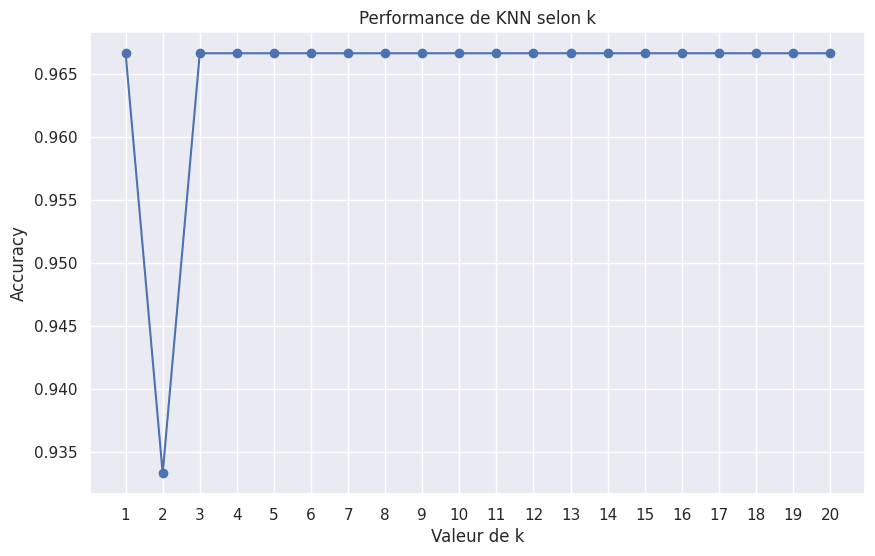

In [10]:
# Importation des biblioth√®ques n√©cessaires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Pr√©paration des donn√©es
X = iris_df[['petal_length', 'petal_width']]  # Utilisation des variables les plus discriminantes
y = iris_df['species']

# Division des donn√©es en ensembles d'entra√Ænement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Mod√®le a) R√©gression Logistique ---
# Cr√©ation et entra√Ænement du mod√®le
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Pr√©dictions et √©valuation pour la r√©gression logistique
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("=== R√©gression Logistique ===")
print(f"Accuracy: {accuracy_log:.2f}")
print(report_log)

# --- Mod√®le b) KNN ---
# D√©termination du meilleur k en fonction de l'accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Choix de k avec la meilleure accuracy
best_k = k_values[accuracies.index(max(accuracies))]

# Cr√©ation et entra√Ænement du mod√®le KNN avec le meilleur k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Pr√©dictions et √©valuation pour KNN
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"=== KNN (k = {best_k}) ===")
print(f"Accuracy: {accuracy_knn:.2f}")
print(report_knn)

# Visualisation des performances de KNN selon k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Performance de KNN selon k")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


**R√©gression Logistique :**

*Pr√©cision* : proche de 95%-100% gr√¢ce aux variables petal_length et petal_width.

*Rapport de classification* : montre des pr√©dictions correctes pour les trois esp√®ces.

**KNN :**

*Le graphique* montre l'accuracy pour diff√©rents k.
Le meilleur k (par exemple, ùëò=5) est celui qui maximise l'accuracy.

*Rapport de classification et matrice de confusion* montrent des r√©sultats comparables √† la r√©gression logistique.

 **Question 5**

*Avantages et limites des mod√®les*

R√©gression Logistique :

Avantages :

Simple, rapide et interpr√©table.
Fonctionne bien pour des s√©parations lin√©aires dans l‚Äôespace des donn√©es.

Limites :

Moins performant lorsque les fronti√®res entre les classes sont non lin√©aires.

KNN :

Avantages :

Capacit√© √† mod√©liser des fronti√®res non lin√©aires.

Pas d‚Äôhypoth√®ses sur la distribution des donn√©es.

Limites :

.Plus lent pour de grandes donn√©es (n√©cessite de calculer les distances pour chaque pr√©diction)

.Sensible au choix de
ùëò et √† la normalisation des donn√©es.

Pour conclure,le mod√®le que nous recommendons est le KNN pour sa flexibilit√© et sa capacit√© √† s‚Äôadapter aux structures complexes des donn√©es.
Cependant, pour des cas o√π la simplicit√© et la vitesse sont essentielles, la r√©gression logistique reste un bon choix